# 3_Transform HTSeq raw counts (abs vals) to TPMs.

Made by: Cynthia Soto <br>
Date: March 17th 2021 <br>
Last md: March 19th 2021 <br>

Converted absolute counts to TPMs count (to make the samples comparable)  <br>

**Assumptions:**<br>
1. Matrix expression
2. File with gene_lenghts (run first <Gene_length_extraction_from_GTF> file if you do not have the lenghts vector) 


In [77]:
# Libraries required
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import norm, get_data    ##https://github.com/reneshbedre/bioinfokit 
# load sugarcane RNA-seq expression dataset (Published in Bedre et al., 2019)
# Requires: scikit-learn, pandas, seaborn, matplotlib-venn, statsmodels, textwrap3, numpy, scipy, tabulate, matplotlib, adjustText

# Set some initial configuration 
pd.set_option("display.precision", 3)

In [22]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")    
s_path = str(os.getcwd())+'/*_Log2.csv'       
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


### Transform raw counts to transcript per million "TPM"

Notes:
   1. TPM considers the gene length for normalization
   2. TPM is suitable for sequencing protocols where reads sequencing depends on gene length <br>
More details: https://www.reneshbedre.com/blog/expression_units.html

### Declare functions

In [44]:
# Set ID index as "ID" to a describe() function in a df
def df_with_label_ID(df_stat):
    df_stat.reset_index(level=0, inplace=True)
    df_stat.rename(columns={'index': 'ID'}, inplace=True)
    
    ## use this chunk if you want to give IDs to a describe() functions from a external meta-data
    #     file='../meta-data/ID_samples.csv'
    #     df_meta=pd.read_csv(file, sep='\,', engine='python', usecols=[0,4]) 
    #     #print(df_meta.head(5))
    #     ## merge by sample field
    #     df = pd.merge(df, df_meta, on="sample")    
    df_stat = df_stat.sort_values(['ID'], ascending=[True])   
    return df_stat 

**Load your expression matrix**

In [23]:
#df_expr=pd.read_csv("matrices_de_expresion/all_infected_Log2_17ceros_drop.csv", header=0, sep='\t')    ## ,nrows=100  usecols=[1,3] / Araport11_GFF3.gff
df_expr=pd.read_csv("all_healthy_raw_8ceros_drop.csv", header=0, sep='\t')
df_expr.head(5)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24,zero-counter
0,AT1G01020,175,163,108,117,224,92,267,145,0
1,AT1G01030,20,25,13,13,35,16,22,9,0
2,AT1G01040,2541,2492,1027,1324,2376,638,2296,1018,0
3,AT1G01050,1531,1804,850,1217,2664,406,1851,684,0
4,AT1G01060,11,4,288,18184,32522,219,835,386,0


In [25]:
# delete unnamed columns
df_expr.drop(['zero-counter'], axis='columns', inplace=True)   #, 'Unnamed: 0'
df_expr.head(5)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,AT1G01020,175,163,108,117,224,92,267,145
1,AT1G01030,20,25,13,13,35,16,22,9
2,AT1G01040,2541,2492,1027,1324,2376,638,2296,1018
3,AT1G01050,1531,1804,850,1217,2664,406,1851,684
4,AT1G01060,11,4,288,18184,32522,219,835,386


**load the gene lenght file**

In [26]:
df_gl=pd.read_csv("../meta-data/Araport11_GFF3_genes_lenghts.csv",  usecols = ['Genes','gen_len'], header=0, sep='\t')    
df_gl.head(5)

,Genes,gen_len
0,AT1G01010,1871
1,AT1G01020,1752
2,AT1G01030,1077
3,AT1G01040,7561
4,AT1G01050,1289


**merge the gene length df with the expr matrix df**

In [28]:
## compare number of genes 
print(len(df_expr), len(df_gl))

22426 27655


With **merge** we can join data from 2 df<br>
The **how** argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. 
Only the keys appearing in left and right are present (the intersection), since **how='inner'** by default.<br>
https://pandas.pydata.org/docs/user_guide/merging.html

In [29]:
result = pd.merge(df_expr, df_gl, on=["Genes", "Genes"])

In [30]:
len(result)

22426

In [32]:
result.head(5)

,Genes,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24,gen_len
0,AT1G01020,175,163,108,117,224,92,267,145,1752
1,AT1G01030,20,25,13,13,35,16,22,9,1077
2,AT1G01040,2541,2492,1027,1324,2376,638,2296,1018,7561
3,AT1G01050,1531,1804,850,1217,2664,406,1851,684,1289
4,AT1G01060,11,4,288,18184,32522,219,835,386,3070


In [33]:

result[['Genes','healthy30.1','healthy30','healthy12','gen_len']].head(10)

,Genes,healthy30.1,healthy30,healthy12,gen_len
0,AT1G01020,175,163,108,1752
1,AT1G01030,20,25,13,1077
2,AT1G01040,2541,2492,1027,7561
3,AT1G01050,1531,1804,850,1289
4,AT1G01060,11,4,288,3070
5,AT1G01070,39,106,42,1980
6,AT1G01080,1280,1131,975,1287
7,AT1G01090,5079,6032,1281,1462
8,AT1G01100,1458,1088,483,671
9,AT1G01110,8,31,10,2256


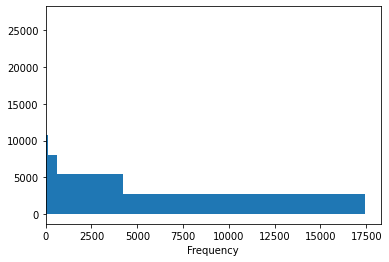

In [34]:
## take a look about the distributions for this specific expression dataset
#result['gen_len'].plot.hist(orientation="horizontal");   #, cumulative=True

In [35]:
# make gene column as index column
df = result.set_index('Genes')
df.head(5)

,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24,gen_len
Genes,,,,,,,,,
AT1G01020,175,163,108,117,224,92,267,145,1752
AT1G01030,20,25,13,13,35,16,22,9,1077
AT1G01040,2541,2492,1027,1324,2376,638,2296,1018,7561
AT1G01050,1531,1804,850,1217,2664,406,1851,684,1289
AT1G01060,11,4,288,18184,32522,219,835,386,3070


In [36]:
# now, normalize raw counts using TPM method
# gene length must be in bp
nm = norm()
nm.tpm(df=df, gl='gen_len')
# get TPM normalized dataframe
tpm_df = nm.tpm_norm

,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
Genes,,,,,,,,
AT1G01020,8.482,7.118,9.930,8.065,7.243,8.547,11.852,9.254
AT1G01030,1.577,1.776,1.944,1.458,1.841,2.418,1.589,0.934


In [37]:
tpm_df.head(5)
# output

,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
Genes,,,,,,,,
AT1G01020,8.482,7.118,9.930,8.065,7.243,8.547,11.852,9.254
AT1G01030,1.577,1.776,1.944,1.458,1.841,2.418,1.589,0.934
AT1G01040,28.536,25.216,21.880,21.147,17.802,13.734,23.615,15.054
AT1G01050,100.854,107.075,106.225,114.017,117.077,51.267,111.675,59.331
AT1G01060,0.304,0.100,15.112,715.292,600.107,11.611,21.152,14.058


In [38]:
## chk the result with the total sum by column 
tpm_df.sum(axis = 0, skipna = True) 

healthy30.1    1.000e+06
healthy30      1.000e+06
healthy12      1.000e+06
healthy18.1    1.000e+06
healthy18      1.000e+06
healthy24.1    1.000e+06
healthy12.1    1.000e+06
healthy24      1.000e+06
dtype: float64

In [59]:
tpm_df.to_csv("../results-data/matrices_de_expresion/all_healthy_TPM.csv", index=True, header=True)

### Some stats of the new df

In [41]:
df_plot=tpm_df.describe().T
df_plot.head(5)

,count,mean,std,min,25%,50%,75%,max
healthy30.1,22426.0,44.591,287.304,0.0,0.797,8.525,27.881,14902.684
healthy30,22426.0,44.591,337.074,0.0,0.654,7.104,25.009,22193.965
healthy12,22426.0,44.591,285.706,0.0,1.482,10.199,29.627,24767.539
healthy18.1,22426.0,44.591,353.710,0.0,0.942,7.839,24.494,29718.510
healthy18,22426.0,44.591,391.117,0.0,0.997,7.393,23.217,36543.769


In [45]:
## call the fuction df_with_label_ID
df_plot = df_with_label_ID(df_plot)
df_plot.head(5)

,ID,count,mean,std,min,25%,50%,75%,max
2,healthy12,22426.0,44.591,285.706,0.0,1.482,10.199,29.627,24767.539
6,healthy12.1,22426.0,44.591,274.744,0.0,1.248,10.185,30.402,23438.856
4,healthy18,22426.0,44.591,391.117,0.0,0.997,7.393,23.217,36543.769
3,healthy18.1,22426.0,44.591,353.710,0.0,0.942,7.839,24.494,29718.510
7,healthy24,22426.0,44.591,312.984,0.0,1.101,8.638,26.378,17294.532


In [46]:
df_plot.to_csv("../results-data/statistics/all_TPM_healthy_stats.csv", index=False, header=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'healthy12'),
  Text(1, 0, 'healthy12.1'),
  Text(2, 0, 'healthy18'),
  Text(3, 0, 'healthy18.1'),
  Text(4, 0, 'healthy24'),
  Text(5, 0, 'healthy24.1'),
  Text(6, 0, 'healthy30'),
  Text(7, 0, 'healthy30.1')])

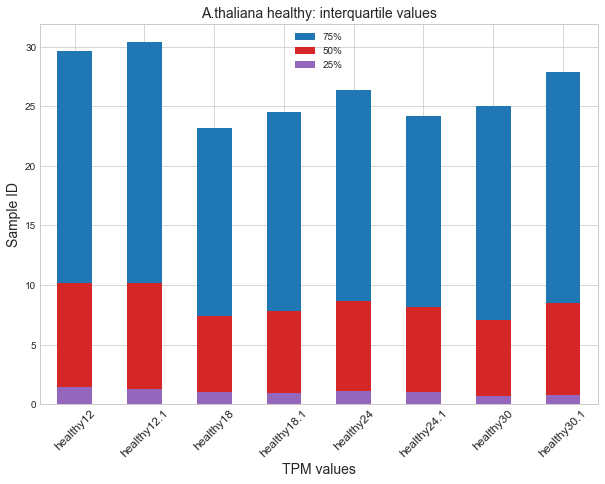

In [79]:
ax = df_plot.plot(x="ID", y="75%", kind="bar", figsize=(10,7))
#df_plot.plot(x="ID", y="75%", kind="bar", ax=ax, color="C2")
df_plot.plot(x="ID", y="50%", kind="bar", ax=ax, color="C3")
df_plot.plot(x="ID", y="25%", kind="bar", ax=ax, color="C4")
plt.title('A.thaliana healthy: interquartile values',fontsize=14);
plt.xlabel('TPM values',fontsize=14);
plt.ylabel('Sample ID',fontsize=14);
plt.xticks(rotation=45,fontsize=12)
#plt.show()

/home/cyntsc/Proyectos/tesis-code/jn_tesis_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


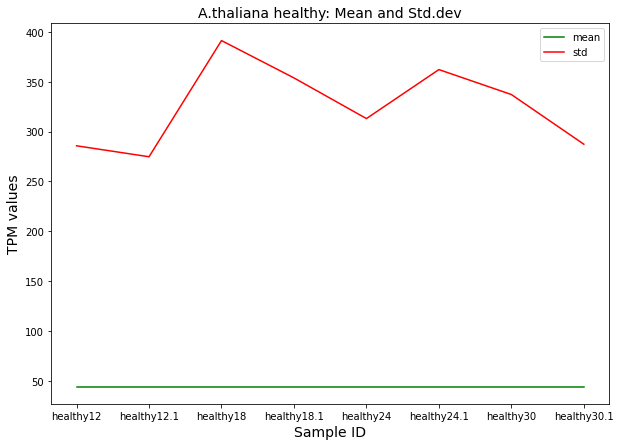

In [50]:
## gca stands for 'get current axis'
ax = plt.gca()
df_plot.plot(kind='line',x='ID',y='mean',color='green', ax=ax, figsize=(10,7))
df_plot.plot(kind='line',x='ID',y='std', color='red', ax=ax)
plt.title('A.thaliana healthy: Mean and Std.dev',fontsize=14);
plt.xlabel('Sample ID',fontsize=14);
plt.ylabel('TPM values',fontsize=14);

In [53]:
## Check number of zeros by sample
sr_ceros = tpm_df.isin([0]).sum()
type(sr_ceros)
## transform the pandas serie into a pandas df
df_ceros = sr_ceros.to_frame()

In [54]:
df_ceros

,0
healthy30.1,2460
healthy30,2472
healthy12,2168
healthy18.1,2399
healthy18,1660
healthy24.1,2474
healthy12.1,1811
healthy24,2132


### Now explore the new distributions with no zeros across all samples
Plot all the sample in one plot (histogram and KDE)

In [74]:
# load file to be plotted
print(os.getcwd())
df_nozeros = pd.read_csv("matrices_de_expresion/all_healthy_TPM.csv", sep=',')  
df_nozeros.drop(['Genes'], axis=1, inplace = True)
df_nozeros.head(3)

/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,8.482,7.118,9.930,8.065,7.243,8.547,11.852,9.254
1,1.577,1.776,1.944,1.458,1.841,2.418,1.589,0.934
2,28.536,25.216,21.880,21.147,17.802,13.734,23.615,15.054


In [75]:
## Get sample list names
sample_lst=df_nozeros.columns
print(sample_lst)
df_nozeros.head(5)

Index(['healthy30.1', 'healthy30', 'healthy12', 'healthy18.1', 'healthy18',
       'healthy24.1', 'healthy12.1', 'healthy24'],
      dtype='object')


,healthy30.1,healthy30,healthy12,healthy18.1,healthy18,healthy24.1,healthy12.1,healthy24
0,8.482,7.118,9.930,8.065,7.243,8.547,11.852,9.254
1,1.577,1.776,1.944,1.458,1.841,2.418,1.589,0.934
2,28.536,25.216,21.880,21.147,17.802,13.734,23.615,15.054
3,100.854,107.075,106.225,114.017,117.077,51.267,111.675,59.331
4,0.304,0.100,15.112,715.292,600.107,11.611,21.152,14.058


[1.576823961409228, 28.5360820774917, 100.8535504754142, 0.3042448448015493, 1.6725085063401974, 84.45013365346955, 294.98488185011206, 184.5032082404041, 0.3011062777371877]
[1.7759387559573026, 25.215784219514394, 107.07480578617502, 0.09968396300539492, 4.0958529344969214, 67.23381232098718, 315.6586099666594, 124.0537950343144, 1.0512990646302562]
[1.9444074765414232, 21.880177400684282, 106.22473141969598, 15.111714694154658, 3.416990201782235, 122.03536434936554, 141.14366503805002, 115.95360192933157, 0.7140367062994791]
[1.4576723717792774, 21.146622884578928, 114.01708520274781, 715.2919222722079, 10.49048410403576, 92.0497755461456, 148.5990606538409, 90.52691867893611, 0.5352949892274556]
[1.840952126384375, 17.801530884862355, 117.07696536559791, 600.1074576403132, 8.897855582627235, 93.49020656690699, 151.57990388379292, 111.35569408188067, 0.5524255278945212]
[2.4180567821951064, 13.734209136709714, 51.26669630993972, 11.610955350547322, 5.014491048607068, 54.255149050502

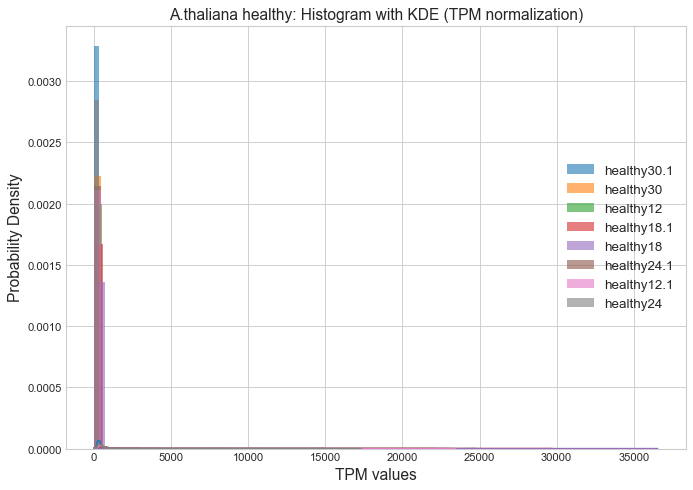

In [78]:
# Plot the distributions: values are raw data - not normalized 

plt.style.use('seaborn-whitegrid')
kwargs=dict(hist_kws={"alpha":0.6, "lw": 2})

plt.figure(figsize=(10,7), dpi= 80)
for file in sample_lst:
    sample_data = df_nozeros[file].tolist()
    print(sample_data[1:10])
    #sns.distplot(sample_data, label=ID_sample+' hpi', **kwargs)   #color="dodgerblue", 
    sns.distplot(sample_data, label=file, **kwargs)   #color="dodgerblue", 

plt.title('A.thaliana healthy: Histogram with KDE (TPM normalization)',fontsize=14);
plt.xlabel('TPM values',fontsize=14);
plt.ylabel('Probability Density',fontsize=14);
## add arbitrary lines to canvas
#plt.plot([0, 15], [.15, .15], 'k-', lw=2, color='blue',marker = 'o')
#plt.plot([0, 15], [.74, .74], 'k-', lw=2, color='red',marker = '*')
plt.legend(loc='center right',fontsize=12);    
#plt.savefig("../plots/all_infected_KDE_17zeros_drop.png");